In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


In [ ]:

"""Titanic Dataset: 
"""
titanic_data = pd.read_csv("data/titanic.csv")  # from https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
X = titanic_data.drop(columns = ["Survived", "PassengerId", "Name", "Cabin", "Ticket"])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [40]:
y = titanic_data["Survived"]
print(y.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [39]:
#Encoding categorical features
X_encoded = pd.get_dummies(X)

In [38]:

## Train/test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=24, stratify =y)

In [44]:
## Base learner: Decision tree

tree = DecisionTreeClassifier(random_state=24)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Accuracy score
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.3f}")


Decision Tree Accuracy: 0.788


In [45]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=80,
    bootstrap=True,      # resample with replacement
    max_samples=1.0,     # same number of samples as training set
    max_features = 0.5,  # features that the classifier chose
    random_state=24
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)


acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Accuracy: {acc_bag:.3f}")

Bagging Accuracy: 0.849


/tmp/ipykernel_38924/2923123885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")


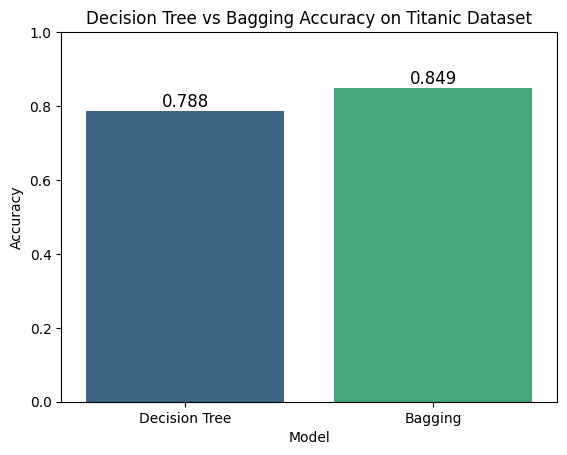

In [46]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Bagging"],
    "Accuracy": [acc_tree, acc_bag]
})
sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")
plt.ylim(0, 1)
plt.title("Decision Tree vs Bagging Accuracy on Titanic Dataset")
for i, val in enumerate(results["Accuracy"]):
    plt.text(i, val + 0.01, f"{val:.3f}", ha="center", fontsize=12)
plt.show()